# Project 1: The Movie Database (TMDB)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

    Dataset has about 10,867 movies collected from The Movie Database (TMDB), including different movies, genres, popularity, runtime, number of stars, user ratings, ...


### Questions for Analysis
- **Q1:** Which movie is **the most/the least** popular? 
- **Q2:** What is **average/min/max** duration of a movie? 
- **Q3:** What is **the most expensive/the cheapest** movie?
- **Q4:** Has correlation between popularity and number of vote?
- **Q5:** Analyze some features on top voting	(vote_average >= 7):
    - **Cast** features: Which **actors** is audient the most like on top 10?
    - **Genres** features: Which **genres** is audient the most like on top 10?

In [3]:
# Import tools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

#### Assess Data

In this step, we view the dataset and get basic information.

In [4]:
# load dataset
df = pd.read_csv('./tmdb-movies.csv')
# Check dataset's sample
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [5]:
# Check shape of dataset
df.shape

(10866, 21)

In [6]:
# Check column's name
list(df.columns)

['id',
 'imdb_id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'homepage',
 'director',
 'tagline',
 'keywords',
 'overview',
 'runtime',
 'genres',
 'production_companies',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year',
 'budget_adj',
 'revenue_adj']

In [7]:
# Show information about dataset: Number of rows, number of columns, dtype, ...
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### Overall observation
* There are **10,866 rows** and **21 columns** in the dataset.
* Each row is a movie and each column shows its properities: `popularity`, `budget`, `revenue`, `cast`, `director`, `runtime`, `overview`, etc.

#### Some Columns Description

| **Columns Name**             | **Description**                                |
|-------------------------|:-----------------------------------------------|
|  `id`                   | unique identifier of each movie                |
|  `imdb_id`              | unique identifier of each movie on IMDB        |
|  `popularity`           | popularity score                               |
|  `budget`               | budget                           |
|  `revenue`              | revenue                       |
|  `original_title`       | original title                             |
|  `cast`                 | names of the cast                              |
|  `homepage`             | website                                        |
|  `director`             | director                                   |
|  `tagline`              | movie tagline                                  |
|  `keywords`             | highlighed words about the movie               |
|  `overview`             | short description                              |
|  `runtime`              | total duration of a movie       |
|  `genres`               | movie type                                     |
|  `production_companies` | companies that produce the movie               |
|  `release_date`         | release date                                   |
|  `vote_count`           | the number of votes                            |
|  `vote_average`         | voting score on average                        |
|  `release_year`         | release year                                   |
|  `budget_adj`           | inflation-adjusted budget in 2010 US dollars   |
|  `revenue_adj`          | inflation-adjusted revenue in 2010 US dollars  |

In [8]:
# Summary dataset's statistics
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# Check NULL values for each columns
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

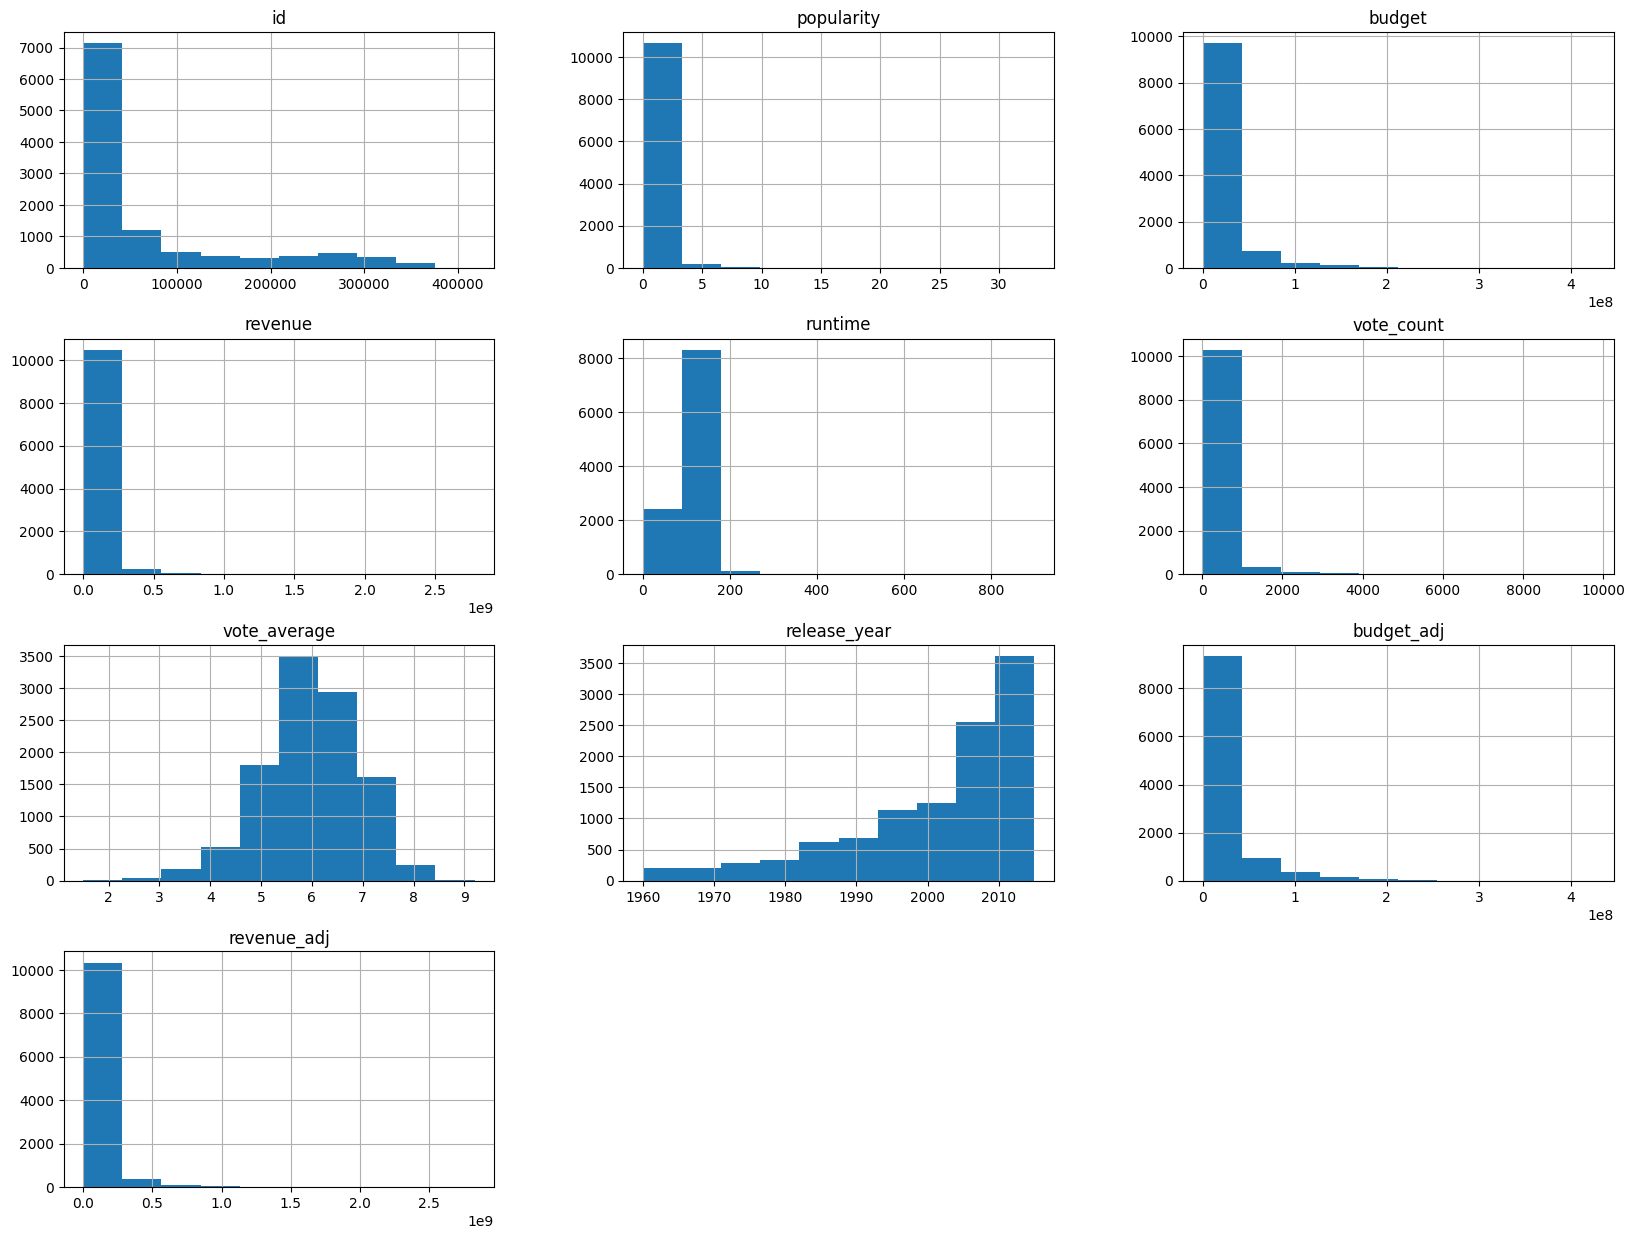

In [10]:
# Check distribution of each numeric column 
df.hist(figsize =(20,15));

In [11]:
# Check number of '0' value in 'budget'
df[df['budget'] == 0]['budget'].count() / len(df) * 100

52.42039388919566

In [12]:
# Check number of '0' value in 'revenue'
df[df['revenue'] == 0]['revenue'].count() / len(df) * 100

55.365359838026876

In [13]:
# Check number of '0' value in 'runtime'
df[df['runtime'] == 0]['runtime'].count() / len(df) * 100

0.2852935762930241

/tmp/ipykernel_31/3499202062.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


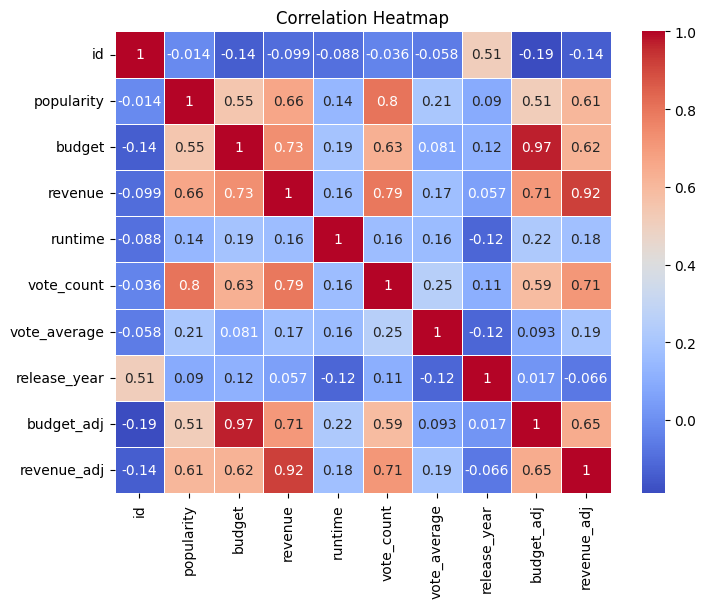

In [14]:
# Calculate the correlation matrix
corr_matrix = df.corr()
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Correlation summary from correlation matrix:
- Vote count high possitive correlate with some other properities:
    + Corr(vote count, popularity) = `0.8`
    + Corr(vote count, budget) = `0.63`
    + Corr(vote count, revenue) = `0.79`
- Budget high possitive correlate with budget_adj = `0.97`
- Revenue high possitive correlate with revanue_adj = `0.92`

In [11]:
# Confirm the number of duplicated row(s)
sum(df.duplicated())

1

In [30]:
# Check duplicated rows
df_duplicated = df[df.duplicated()]
df_duplicated

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


#### Next actions for cleaning data
* Remove 1 duplicate row
* Remove unnessary columns, including `imdb_id`, `budget_adj`, `revenue_adj`, `homepage`, `keywords`, `tagline`, `director`, `production_companies` and `overview`
* Add 1 columns `profit` to analyze profit
* Remove noise rows that have '0' values in `budget` and `revenue` in profit analysis. 
* Remove noise  rows that have '0' values in `runtime`in runtime analysis.
* Process `NULL` data if need


### Data Cleaning

In [15]:
# Delete duplicates except for the first occurrence
df.drop_duplicates(keep='first', inplace=True)
df.shape

(10865, 21)

In [16]:
# Remove unnessary columns
df.drop(['imdb_id','budget_adj','revenue_adj','homepage','keywords','tagline','overview', 'production_companies', 'director'], axis=1, inplace=True)

# Check sample data to confirm changes
df.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


In [17]:
df.shape

(10865, 12)

After cleaning, data remain **10,865 rows** and **12 columns**.

In [18]:
# Check columns after removing
list(df.columns)

['id',
 'popularity',
 'budget',
 'revenue',
 'original_title',
 'cast',
 'runtime',
 'genres',
 'release_date',
 'vote_count',
 'vote_average',
 'release_year']

In [19]:
# Check the number NULL values in each column
df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

<a id='eda'></a>
## Exploratory Data Analysis

### Define functions

In [51]:
# function to calculate maximum value on 1 column
def calculate_max(column):
    """
    Inputs: 
        column: 1 dataframe's column
    Outputs:
        Return maximum value of column
    """ 
    return column.max()

# function to calculate maximum value on 1 column
def calculate_min(column):
    """
    Inputs: 
        column: 1 dataframe's column
    Outputs:
        Return minimum value of column
    """ 
    return column.min()

### Q1. Which movie is the most / the least popular? 

In [21]:
# Most popular movie
max_value = calculate_max(df['popularity'])
# max_value = df['popularity'].max()
df.query('popularity == {}'.format(max_value))

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [22]:
# Least popular movie
min_value = calculate_min(df['popularity'])
# min_value = df['popularity'].min()
df.query('popularity == {}'.format(min_value))

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
6181,18729,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,561,Drama|History|Western,11/3/85,17,6.0,1985


#### Answer for Question1
- The most popular movie is **Jurassic World**
- The least popular movie is **North and South, Book I**

### Q2: What is the average/min/max duration of a movie?

In [23]:
# Remove '0' values in 'runtime' column
df_runtime = df[df.runtime > 0]

In [24]:
df_runtime['runtime'].mean()

102.3638545320288

In [25]:
df_runtime['runtime'].max()

900

In [26]:
df_runtime['runtime'].min()

2

#### Answer for Question2
- The average duration of a movie is about **102 minutes**
- The minimum duration of a movie is about **900 minutes**
- The maximum duration of a movie is about **2 minutes**

### Q3: What is the most expensive/the cheapest movie?

In [27]:
# Remove '0' values in 'budget' column
df_budget = df[df.budget > 0]

In [28]:
# Cheapest movie
min_value = calculate_min(df_budget['budget'])
# min_value = df_budget['budget'].min()
df_budget.query('budget == {}'.format(min_value))

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
1151,287524,0.177102,1,0,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,95,Horror,10/31/14,15,4.1,2014
2618,39964,0.090186,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,95,Comedy|Romance,4/23/99,14,4.8,1999
3065,12689,0.472691,1,0,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,100,Comedy|Drama|Family|Romance,7/25/08,146,6.5,2008
3581,59296,0.520430,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,90,Comedy|Romance,6/3/11,55,5.3,2011


In [29]:
# Most expensive movie
max_value = calculate_max(df_budget['budget'])
# max_value = df_budget['budget'].max()
df_budget.query('budget == {}'.format(max_value))

,id,popularity,budget,revenue,original_title,cast,runtime,genres,release_date,vote_count,vote_average,release_year
2244,46528,0.25054,425000000,11087569,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,100,Adventure|Fantasy|Action|Western|Thriller,12/2/10,74,6.4,2010


#### Answer for Question3
- The **most expensive** movie: **The Warrior's Way**
- The **the cheapest** movie: **Fear Clinic, Lost & Found, Angus, Thongs and Perfect Snogging, Love, Wedding, Marriage**

### Q4: Has correlation between popularity and number of vote?

In [30]:
# Calculate correlation
df[['popularity', 'vote_count']].corr()

,popularity,vote_count
popularity,1.000000,0.800828
vote_count,0.800828,1.000000


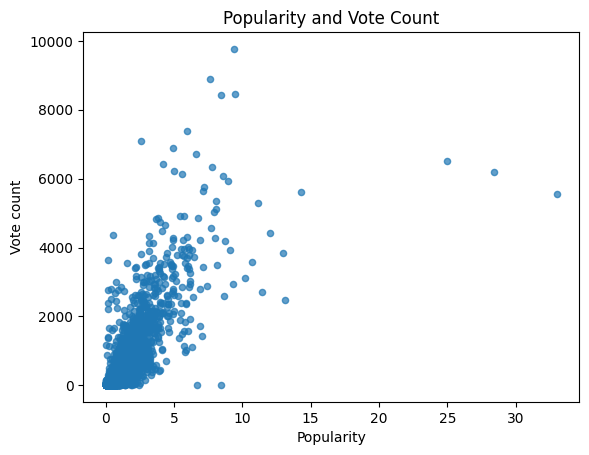

In [32]:
# Plot the 'popularity' and 'voting_count'
df.plot(kind='scatter', title='Popularity and Vote Count',
        x='popularity', y='vote_count',
        xlabel = 'Popularity', ylabel = 'Vote count',
        alpha=0.7, s=20);

#### Answer for Question4
Yes. Has positive correlation between Popularity and Vote Count.
Its mean that the more popular the movie, the more votes it gets.

### Q5: Analyze some features on top voting	(vote_average >= 7):
- **Cast** features: Which **actors** is audient the most like on top 10?
- **Genres** features: Which **genres** is audient the most like on top 10?

In [40]:
# Get top average vote data
df_top_vote = df.query('vote_average >= 7')
df_top_vote.shape

(1561, 12)

In [41]:
# Remove "|" characters
cast_split = df_top_vote['cast'].str.split('|', expand=False)
cast_split

1        [Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...
3        [Harrison Ford, Mark Hamill, Carrie Fisher, Ad...
4        [Vin Diesel, Paul Walker, Jason Statham, Miche...
5        [Leonardo DiCaprio, Tom Hardy, Will Poulter, D...
7        [Matt Damon, Jessica Chastain, Kristen Wiig, J...
                               ...                        
10835    [Steve McQueen, Richard Attenborough, Richard ...
10839    [Christopher Shea, Sally Dryer, Kathy Steinber...
10842    [Sterling Holloway, Junius Matthews, Sebastian...
10860    [Kenneth Williams, Jim Dale, Harry H. Corbett,...
10861    [Michael Hynson, Robert August, Lord 'Tally Ho...
Name: cast, Length: 1561, dtype: object

In [42]:
# create dataframe with single column
df_cast = pd.DataFrame({"list_cast": cast_split.tolist()})
df_cast.head()

,list_cast
0,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,..."
1,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad..."
2,"[Vin Diesel, Paul Walker, Jason Statham, Miche..."
3,"[Leonardo DiCaprio, Tom Hardy, Will Poulter, D..."
4,"[Matt Damon, Jessica Chastain, Kristen Wiig, J..."


In [43]:
# separate list into row with replicating index values
df_cast = df_cast.explode(column="list_cast")
df_cast

,list_cast
0,Tom Hardy
0,Charlize Theron
0,Hugh Keays-Byrne
0,Nicholas Hoult
0,Josh Helman
...,...
1560,Michael Hynson
1560,Robert August
1560,Lord 'Tally Ho' Blears
1560,Bruce Brown


In [44]:
# Get top 10 actors
df_cast['list_cast'].value_counts()[:10].to_dict()

{'Robert De Niro': 20,
 'Tom Hanks': 18,
 'Samuel L. Jackson': 16,
 'Brad Pitt': 14,
 'Michael Caine': 13,
 'Mark Ruffalo': 12,
 'Johnny Depp': 12,
 'Leonardo DiCaprio': 12,
 'Al Pacino': 12,
 'Scarlett Johansson': 11}

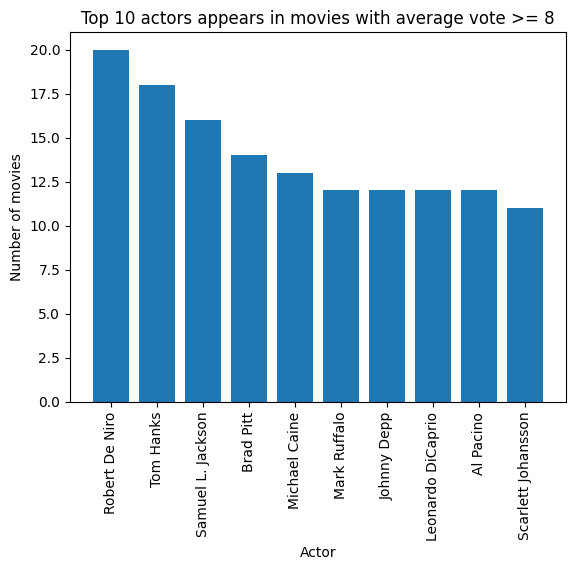

In [45]:
# Visualize top 10 actors
data = df_cast['list_cast'].value_counts()[:10].to_dict()
actor_list = list(data.keys())
n_movie = list(data.values())
plt.bar(actor_list, n_movie)
plt.xticks(rotation='vertical')

plt.xlabel("Actor")
plt.ylabel("Number of movies")
plt.title("Top 10 actors appears in movies with average vote >= 8")
plt.show()

#### Answer for Question5
Base on graph above, we can see that top 10 actors who audient the most like are **`Robert De Niro`,
                                             `Tom Hanks`,
                                             `Samuel L. Jackson`,
                                             `Brad Pitt`,
                                             `Michael Caine`,
                                             `Mark Ruffalo`,
                                             `Johnny Depp`,
                                             `Leonardo DiCaprio`,
                                             `Al Pacino`,
                                             `Scarlett Johansson`**

In [46]:
# Remove "|" characters
genres_split = df_top_vote['genres'].str.split('|', expand=False)
genres_split

1        [Action, Adventure, Science Fiction, Thriller]
3         [Action, Adventure, Science Fiction, Fantasy]
4                             [Action, Crime, Thriller]
5                 [Western, Drama, Adventure, Thriller]
7                   [Drama, Adventure, Science Fiction]
                              ...                      
10835          [Action, Adventure, Drama, War, Romance]
10839                               [Family, Animation]
10842                               [Animation, Family]
10860                                          [Comedy]
10861                                     [Documentary]
Name: genres, Length: 1561, dtype: object

In [47]:
# create dataframe with single column
df_genres = pd.DataFrame({"list_genres": genres_split.tolist()})
df_genres.head()

,list_genres
0,"[Action, Adventure, Science Fiction, Thriller]"
1,"[Action, Adventure, Science Fiction, Fantasy]"
2,"[Action, Crime, Thriller]"
3,"[Western, Drama, Adventure, Thriller]"
4,"[Drama, Adventure, Science Fiction]"


In [48]:
# separate list into row with replicating index values
df_genres = df_genres.explode(column="list_genres")
df_genres

,list_genres
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action
...,...
1557,Animation
1558,Animation
1558,Family
1559,Comedy


In [49]:
# Get top 10 genres
df_genres['list_genres'].value_counts()[:10].to_dict()

{'Drama': 779,
 'Comedy': 385,
 'Documentary': 268,
 'Action': 231,
 'Thriller': 230,
 'Crime': 206,
 'Adventure': 190,
 'Romance': 173,
 'Animation': 171,
 'Family': 164}

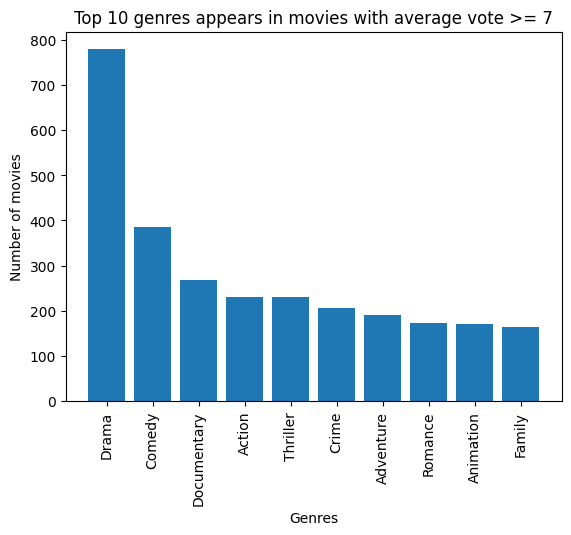

In [50]:
# Visualize top 10 genres
data = df_genres['list_genres'].value_counts()[:10].to_dict()
actor_list = list(data.keys())
n_movie = list(data.values())
plt.bar(actor_list, n_movie)
plt.xticks(rotation='vertical')

plt.xlabel("Genres")
plt.ylabel("Number of movies")
plt.title("Top 10 genres appears in movies with average vote >= 7")
plt.show()

#### Answer for Question5
Base on graph above, we can see that top 10 genres which audient the most like are **`Drama`,
                                             `Comedy`,
                                             `Documentary`,
                                             `Action`,
                                             `Thriller`,
                                             `Crime`,
                                             `Adventure`,
                                             `Romance`,
                                             `Animation`,
                                             `Family`**

<a id='conclusions'></a>
## Conclusions

This project use data TMDB movies for analysis a few things as below:
- Find out movie which has the most/least popular. 
- Find out movie which has average, minimum, maximum duration.
- Find out movie which has the most expensive/the cheapest budget.
- Find out correlation between some features: popularity, budget, revenue and vote_count, etc.
- Find out top 10 actors which audient the most like.
- Find out top 10 genres which audient the most like.

The limitation of this project is timeline-based factors have not been analyzed yet. 
For example, analyze average revenue, average budget and each year.

Some references:
- [1] https://www.kaggle.com/ 
- [2] https://www.geeksforgeeks.org/ 
- [3] https://www.w3schools.com/ 
- [4] https://stackoverflow.com/
